 I got my dataset from the dataset google drive. It is roller_coasters.csv. I found this dataset to be very interesting due to the 1087 rows and 56 columns which at the end of this project won't use all the columns and rows. This dataset has variables such as speed,cost,type of material, and height. These variables are self explainatory however will need some data wrangling to make them possible to mantipulate correctly. One goals for this project is   to explore how the type of material of a roller coaster can impact its overall speed? I also want to know how fast median/range of the speeds of roller coasters? One fun question is highest inversions in all the rollercoaster?

Loading in the dataset for the Project

In [2]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks")
rollercoasters = pd.read_csv("/content/drive/MyDrive/Google colab/roller_coasters.csv")
print(rollercoasters)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                coaster_name                Length  \
0                         Switchback Railway        600 ft (180 m)   
1                          Flip Flap Railway                   NaN   
2     Switchback Railway (Euclid Beach Park)                   NaN   
3               Loop the Loop (Coney Island)                   NaN   
4               Loop the Loop (Young's Pier)                   NaN   
...                                      ...                   ...   
1082                 American Dreier Looping    3,444 ft (1,050 m)   
1083               Pantheon (roller coaster)    3,328 ft (1,014 m)   
1084               Tron Lightcycle Power Run  3,169.3 ft (966.0 m)   
1085                                 Tumbili        770 ft (230 m)   
1086          Wonder Woman Flight of Courage    3,300 ft (1,000 m)   

                        Speed 

In [3]:
rollercoasters['Type'].unique()

array(['Wood', 'Other', 'Steel', 'Wood\xa0– Side friction',
       'Wood\xa0– Shuttle', 'Wood\xa0– Racing', 'Wood\xa0– Out and back',
       'Wood\xa0– Wild Mouse', 'Steel\xa0– Mine Train',
       'Steel\xa0– Dueling', 'Steel\xa0– Kiddie', 'Steel\xa0– Enclosed',
       'Steel\xa0– Wild Mouse', 'Steel\xa0– Dual-tracked\xa0– Enclosed',
       'Steel\xa0– Junior', 'Steel\xa0– Shuttle', 'Steel\xa0– Racing',
       'Steel\xa0– Dueling\xa0– Racing',
       'Steel\xa0– Launched\xa0– Shuttle', 'Steel\xa0– Stand-up',
       'Steel\xa0– Shuttle\xa0– Launched', 'Steel\xa0– Suspended',
       'Steel\xa0– Powered\xa0– Mine Train',
       'Steel\xa0– Powered\xa0– Virtual reality', 'Steel\xa0– Pipeline',
       'Steel\xa0– Enclosed\xa0– Bobsled', 'Steel\xa0– Twister',
       'Steel\xa0– Bobsled', 'Steel\xa0– Wild Mouse\xa0– Enclosed',
       'Steel\xa0– Powered', 'Wood\xa0– Family', 'Steel\xa0– Boomerang',
       'Steel\xa0– Shuttle\xa0– Boomerang',
       'Steel\xa0– Boomerang\xa0– Shuttle', 'Steel\

In [4]:
rollercoasters['Type'] = rollercoasters['Type'].str.replace('\xa0', ' ', regex=True)

In [5]:
def clean_material(value):
    value = value.lower().replace('\xa0', ' ')
    if 'wood' in value:
        return 'Wood'
    elif 'steel' in value:
        return 'Steel'
    else:
        return 'Other'

rollercoasters['Type_Clean'] = rollercoasters['Type'].apply(clean_material)


In [6]:
print(rollercoasters['Type_Clean'].unique())

['Wood' 'Other' 'Steel']


In [7]:
rollercoasters.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean,Type_Clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9,Wood
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0,Wood
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Other
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Steel
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Steel


In [8]:
rollercoasters.dtypes

,0
coaster_name,object
Length,object
Speed,object
Location,object
Status,object
Opening date,object
Type,object
Manufacturer,object
Height restriction,object
Model,object


In [9]:
rollercoasters.isnull().sum()

,0
coaster_name,0
Length,134
Speed,150
Location,0
Status,213
Opening date,250
Type,0
Manufacturer,59
Height restriction,256
Model,343


Checking that cost has NAs

In [10]:
rollercoasters['Cost'].head()


,Cost
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


Dropping all the NAs for the Quantative Variables

In [11]:
Roller = rollercoasters.dropna(subset=['Length', 'Speed', 'Height','Cost'])
Roller.isnull().sum()


,0
coaster_name,0
Length,0
Speed,0
Location,0
Status,31
Opening date,31
Type,0
Manufacturer,4
Height restriction,28
Model,79


Dropping two unecessary columns

In [46]:
Roller.drop(columns=['Gforce_clean','Single rider line available'])
Roller.head()


,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean,Type_Clean
13,Racer (1910 roller coaster),"4,500 ft (1,400 m)",40 mph (64 km/h),Kennywood,Operating,1927,Wood – Racing,Charlie Mach,46 in (117 cm),Racing,...,64 km/h,40.0,mph,40.0,72.5,ft,NaN,0,NaN,Wood
22,Jack Rabbit (Kennywood),"2,132 ft (650 m)",45 mph (72 km/h),Kennywood,Operating,1920,Wood,Harry C. Baker,42 in (107 cm),NaN,...,72 km/h,45.0,mph,45.0,40.0,ft,NaN,0,NaN,Wood
26,Big Dipper (Blackpool Pleasure Beach),"3,300 ft (1,000 m)",40 mph (64 km/h),Blackpool Pleasure Beach,Operating,23-Aug-23,Wood – Out and back,William Strickler,46 in (117 cm),Wooden Out and back coaster,...,64 km/h,40.0,mph,40.0,65.0,ft,NaN,0,3.7,Wood
29,Giant Dipper,"2,640 ft (800 m)",55 mph (89 km/h),Santa Cruz Beach Boardwalk,Operating,17-May-24,Wood,Arthur Looff,50 in (127 cm),NaN,...,89 km/h,55.0,mph,55.0,70.0,ft,NaN,0,NaN,Wood
33,Big Dipper (Geauga Lake),"2,680 ft (820 m)",32 mph (51 km/h),Geauga Lake,Removed,1925,Wood,NaN,48 in (122 cm),Out and Back roller coaster,...,51 km/h,32.0,mph,32.0,65.0,ft,NaN,0,NaN,Wood


Making sure all my variables I will use has no NAs

In [13]:
Roller.isnull().sum()

,0
coaster_name,0
Length,0
Speed,0
Location,0
Status,31
Opening date,31
Type,0
Manufacturer,4
Height restriction,28
Model,79


Importing all the necessary Packages

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
print(Roller.info())

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 13 to 1081
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   353 non-null    object 
 1   Length                         353 non-null    object 
 2   Speed                          353 non-null    object 
 3   Location                       353 non-null    object 
 4   Status                         322 non-null    object 
 5   Opening date                   322 non-null    object 
 6   Type                           353 non-null    object 
 7   Manufacturer                   349 non-null    object 
 8   Height restriction             325 non-null    object 
 9   Model                          274 non-null    object 
 10  Height                         353 non-null    object 
 11  Inversions                     330 non-null    float64
 12  Lift/launch system             311 non-null    object

Three plots for my question

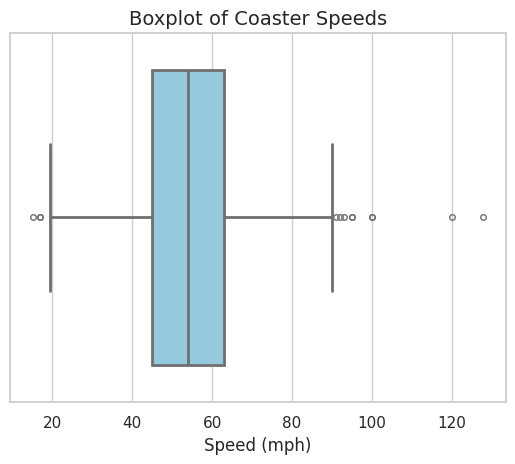

In [34]:
sns.boxplot(
    x='speed_mph',
    data=Roller,
    color='skyblue',
    fliersize=4,
    linewidth=2)
plt.title('Boxplot of Coaster Speeds', fontsize=14)
plt.xlabel('Speed (mph)', fontsize=12)
plt.show()

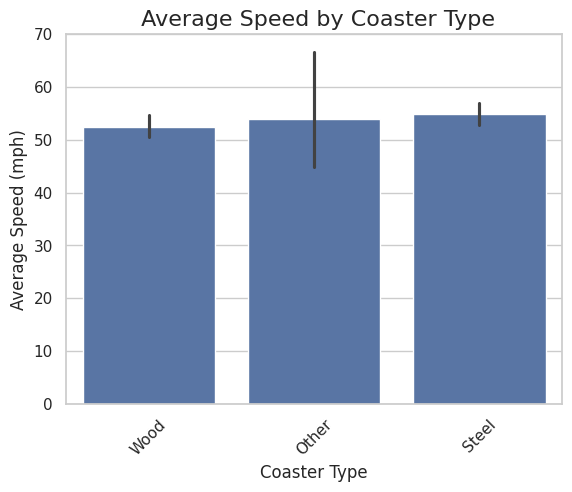

In [27]:
sns.barplot(x='Type_Clean', y='speed_mph', data=Roller)  # if 'Type' is a category
plt.xticks(rotation=45)
plt.title(' Average Speed by Coaster Type', fontsize=16)
plt.xlabel('Coaster Type', fontsize=12)
plt.ylabel('Average Speed (mph)', fontsize=12)

plt.show()


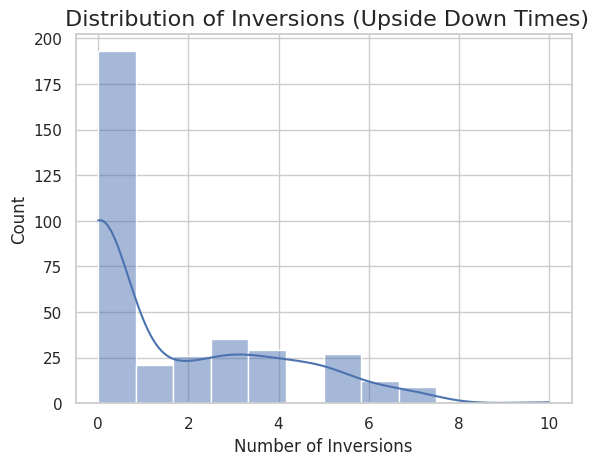

In [47]:
sns.set(style="whitegrid")

sns.histplot(Roller['Inversions_clean'], kde=True)
plt.title(' Distribution of Inversions (Upside Down Times)', fontsize=16)
plt.xlabel('Number of Inversions', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

nonparametric inference of the Median for a quantitative variable in the
dataset

In [40]:

sample_size = int(0.1 * len(Roller))
sample_data = Roller['speed_mph'].dropna().sample(n=sample_size, random_state=42)

# Step 2: Bootstrapping
n_bootstraps = 1000
boot_medians = np.empty(n_bootstraps)

for i in range(n_bootstraps):
    boot_sample = sample_data.sample(n=sample_size, replace=True)
    boot_medians[i] = np.median(boot_sample)

# Step 3: Compute the 95% Confidence Interval
ci_lower = np.percentile(boot_medians, 2.5)
ci_upper = np.percentile(boot_medians, 97.5)

print(f"95% Confidence Interval for the Median Speed: [{ci_lower:.2f}, {ci_upper:.2f}]")


95% Confidence Interval for the Median Speed: [50.00, 62.00]


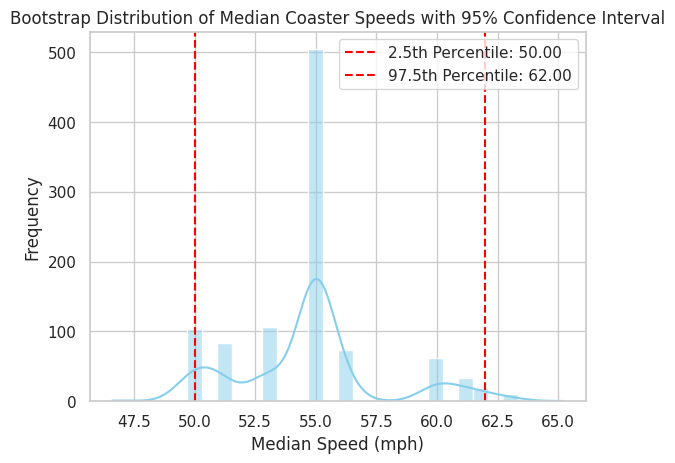

In [45]:
sns.histplot(boot_medians, bins=30, kde=True, color='skyblue')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'2.5th Percentile: {ci_lower:.2f}')
plt.axvline(ci_upper, color='red', linestyle='--', label=f'97.5th Percentile: {ci_upper:.2f}')
plt.xlabel('Median Speed (mph)')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Median Coaster Speeds with 95% Confidence Interval')
plt.legend()
plt.show()
